# Student Performance Dataset Exploration
## by Nishant Jha

## Preliminary Wrangling

This document explores a dataset containing certain scores and attributes for 1000 students.

In [1]:
# import all packages and set plots to be embedded inline with certain appearance changes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("darkgrid", {'xtick.bottom': True, 'ytick.left': True})
sns.set_context("paper", font_scale=1.4)

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('StudentsPerformance.csv')

# high-level overview of data shape and composition
print(df.shape)
df.info()

(1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
# renaming columns for ease of use
df.rename(columns = {'race/ethnicity': 'ethnicity'}, inplace = True)
df.columns = df.columns.str.replace(" ", "_")
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# print statistics
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
# creating a column for percentage
df["percentage"] = round((df.math_score + df.reading_score + df.writing_score)/3, 2)
df.head(2)

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33


In [6]:
# function for grading criteria based on percentage
def grade(score):
    x = int(10 - score/10) 
    if x >= 6:
        x = 6
    return ['S', 'A', 'B', 'C', 'D', 'E', 'F'][x]

Grading criteria:

- 100-91 - S
- 90-81 - A 
- 80-71 - B 
- 70-61 - C 
- 60-51 - D 
- 50-41 - E 
- Less than or equal to 40 - F

In [7]:
# creating grade columns
df['grade'] = df.percentage.apply(grade)
df.head(2)

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,B
1,female,group C,some college,standard,completed,69,90,88,82.33,A


In [8]:
# convert grade column into categorical column
grade_order = pd.api.types.CategoricalDtype(categories = ['S', 'A', 'B', 'C', 'D', 'E', 'F'], ordered = True)
df.grade = df.grade.astype(grade_order)

In [9]:
# cleaned data composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   object  
 1   ethnicity                    1000 non-null   object  
 2   parental_level_of_education  1000 non-null   object  
 3   lunch                        1000 non-null   object  
 4   test_preparation_course      1000 non-null   object  
 5   math_score                   1000 non-null   int64   
 6   reading_score                1000 non-null   int64   
 7   writing_score                1000 non-null   int64   
 8   percentage                   1000 non-null   float64 
 9   grade                        1000 non-null   category
dtypes: category(1), float64(1), int64(3), object(5)
memory usage: 71.8+ KB


In [10]:
# cleaned data statistics
df.describe()

,math_score,reading_score,writing_score,percentage
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770580
std,15.16308,14.600192,15.195657,14.257311
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.330000
50%,66.00000,70.000000,69.000000,68.330000
75%,77.00000,79.000000,79.000000,77.670000
max,100.00000,100.000000,100.000000,100.000000


In [11]:
# few lines of cleaned data 
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,B
1,female,group C,some college,standard,completed,69,90,88,82.33,A
2,female,group B,master's degree,standard,none,90,95,93,92.67,S
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,E
4,male,group C,some college,standard,none,76,78,75,76.33,B


### What is the structure of your dataset?

- There are 1,000 diamonds in the dataset with 10 features (`gender`, `ethnicity`, `parental_level_of_education`, `lunch`, `test_preparation_course`, `math_score`, `reading_score`, `writing_score`, `percentage` & `grade`). 

- Most variables are qualitative in nature, but the variables `math_score`, `reading_score`, `writing_score`, `percentage` are quantitavive in nature.

- Variable `grade` is an ordered factor variable with the following levels:

(best) ——> (worst) <br>
grade: S, A, B, C, D, E, F

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the scores of the students in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think features such as `test_preparation_course` will have quite an impact on students score & grade. I will also be comparing score values with grade using the `gender` variable for more info.

## Univariate Exploration

I will start by looking at the distribution of all the scores.

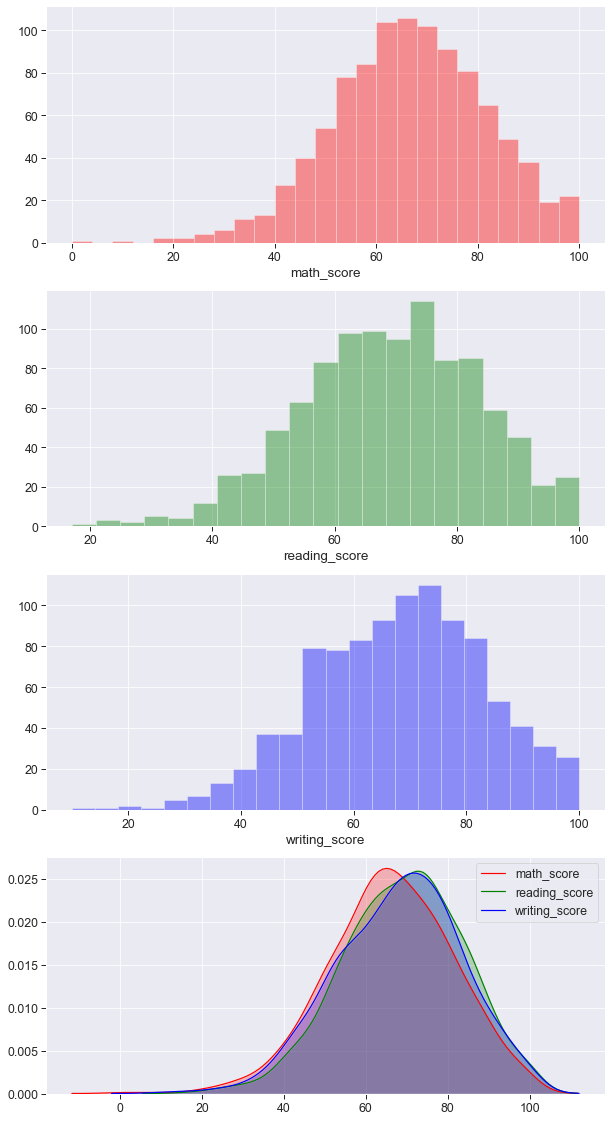

In [12]:
# displot for score variables individually
fig, ax = plt.subplots(4, 1, figsize=(10, 20))
sns.distplot(df.math_score, ax = ax[0], color = 'r', kde = False)
sns.distplot(df.reading_score, ax = ax[1], color = 'g', kde = False)
sns.distplot(df.writing_score, ax = ax[2], color = 'b', kde = False)

# kdeplot for score variables in single plot
sns.kdeplot(df.math_score, ax = ax[3], color = 'r', shade = True)
sns.kdeplot(df.reading_score, ax = ax[3], color = 'g', shade = True)
sns.kdeplot(df.writing_score, ax = ax[3], color = 'b', shade = True)
plt.show()

- The plots are almost normal with some outliers.
- The score-peak for `math_score` & `writing_score` is around 70 with `math_score` being around 65.

Next up is `grade` distribution.

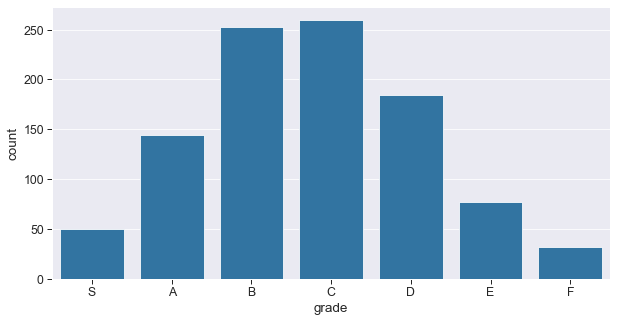

In [13]:
# countplot for grade
plt.figure(figsize = (10, 5))
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'grade', color = base_color)
plt.show()

- The count-peak can be seen at B & C grade which means majority of people scored in the range of 80 - 61.
- This result was expected, as the same was reflected on the above plot.

Next is the count comparison in `gender`.

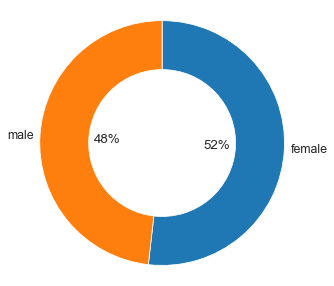

In [14]:
# pieplot for gender count comparison
plt.figure(figsize = (10, 5))
sorted_gender = df.gender.value_counts()
plt.pie(sorted_gender, labels = sorted_gender.index, counterclock = False, startangle = 90, autopct = '%1.0f%%', 
        wedgeprops = {'width': 0.4}, pctdistance = 0.45, labeldistance = 1.05)
plt.axis('square')
plt.show()

- The ratio for male and female is almost 1:1 with females being a little more in presence, in the dataset.

Lastly, the count comparison in `test_preparation_course`.

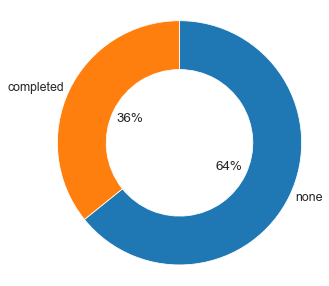

In [15]:
plt.figure(figsize = (10, 5))
sorted_preparation = df.test_preparation_course.value_counts()
plt.pie(sorted_preparation, labels = sorted_preparation.index, counterclock = False, startangle = 90, autopct = '%1.0f%%', 
       wedgeprops = {'width': 0.4}, pctdistance = 0.45, labeldistance = 1.05)
plt.axis('square')
plt.show()

- The result is intriguing as it conveys that only around 1/3rd of students have completed the test preparation course.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The score variables were mostly distributed normal with only some outliers which caused the plot to be very slightly left-skewed. No transformations as such was required.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

As said earlier, there were some outliers for the score variables. These outliers were not removed in order to account them bivariate exploration. Secondly the ratio for male and female gender were found to be almost 1:1 with only sigltly more number of females. This was not accounted for any data cleaning as the difference is not drastic.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between numeric features in the data.

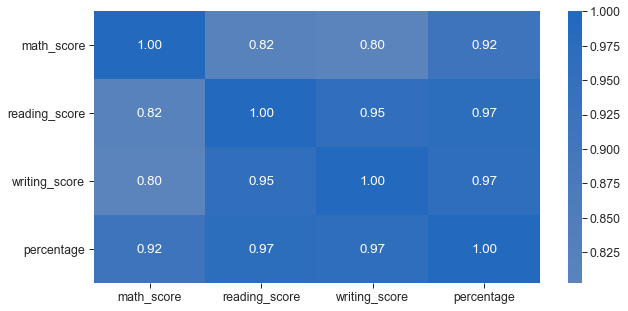

In [16]:
# correlation plot
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', 
            cmap = 'vlag_r', center = 0)
plt.show()

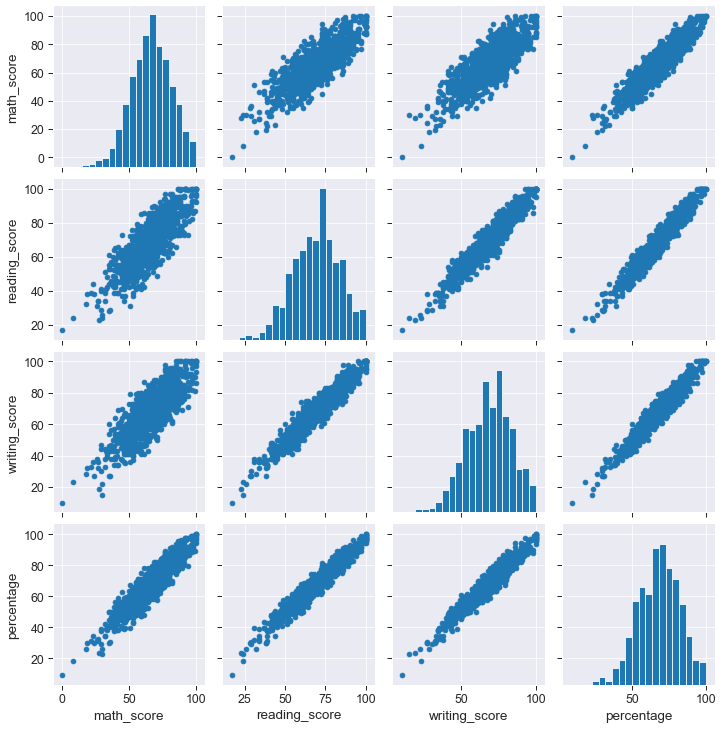

In [17]:
# plot matrix
numeric_vars = ['math_score', 'reading_score', 'writing_score', 'percentage']
g = sns.PairGrid(data = df, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
plt.show()

- All the score values were found to be  highly correlated. 
- And so was `percentage` with all the score features because it is an engineered feature and calculated as an average of all the score values.

Moving on to the `gender` categorical variable.

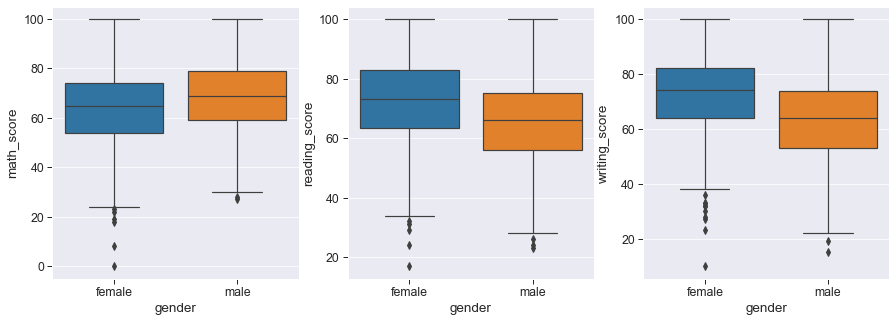

In [18]:
# boxplot for gender vs all the score features
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = df, x = 'gender', y = 'math_score')

plt.subplot(1, 3, 2)
sns.boxplot(data = df, x = 'gender', y = 'reading_score')

plt.subplot(1, 3, 3)
sns.boxplot(data = df, x = 'gender', y = 'writing_score')
plt.show()

- Maximum scores for `math_score`, `reading_score` and `writing_score` is 100, both genders inclusive.
- Overall, female students performed better than male students in `reading_score` and `writing_score` with `math_score` being the exception where male students performed better than female students.
- Outliers for female students below the minimum for `math_score`, `reading_score` and `writing_score` were more compared to male students.

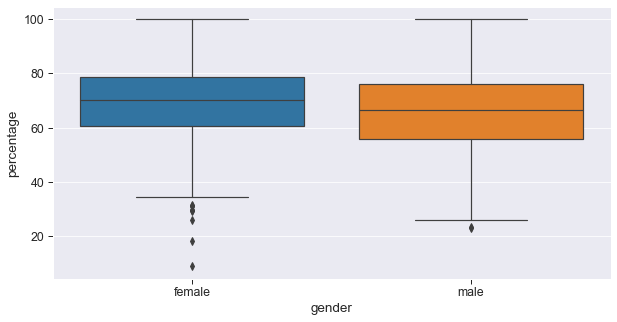

In [19]:
# boxplot for gender vs percentage
plt.figure(figsize = (10, 5))
sns.boxplot(data = df, x = 'gender', y = 'percentage')
plt.show()

- This shows that overall female students did better than male students.

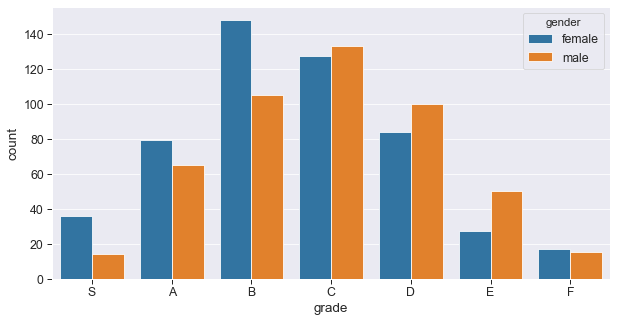

In [20]:
# countplot for grade based seperated by gender
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = 'grade', hue = 'gender')
plt.show()

- Here, female students scored more number of `grade` S, A & B and male students scored more number grade C, D & E as it was expected from the above plot.
- It can be clearly seen that more number of female students failed the exam compared to male students, but this can also be the result of having sligtly more number of female students, compared to male students in the dataset as the difference isn't very drastic.

Next is `test_preparation_course` qualitative variable.

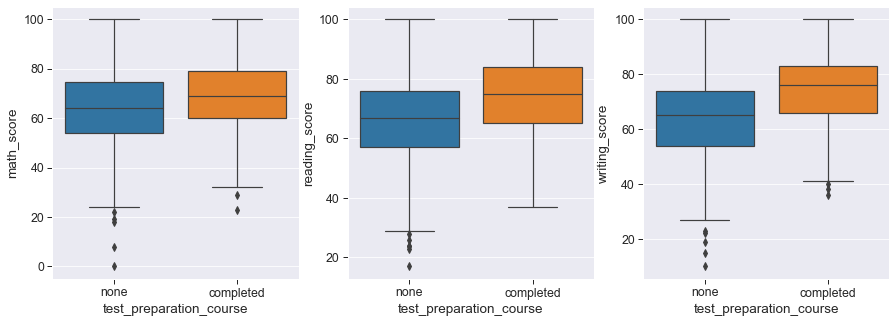

In [21]:
# boxplot for test_preparation_course vs all the score features
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = df, x = 'test_preparation_course', y = 'math_score')

plt.subplot(1, 3, 2)
sns.boxplot(data = df, x = 'test_preparation_course', y = 'reading_score')

plt.subplot(1, 3, 3)
sns.boxplot(data = df, x = 'test_preparation_course', y = 'writing_score')
plt.show()

- The effect of `test_preparation_course` is evident in the scores of students. They have performed better in all the three exams than the students who didn't complete any test preparation.

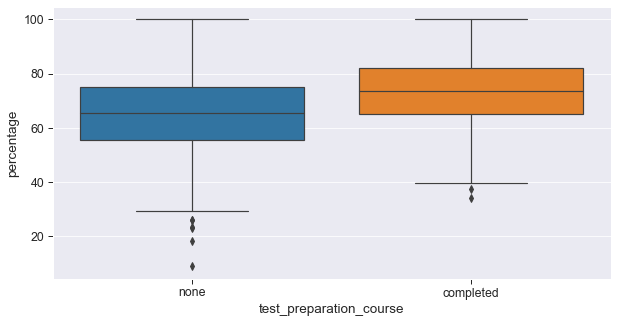

In [22]:
# boxplot for test_preparation_course vs percentage
plt.figure(figsize = (10, 5))
sns.boxplot(data = df, x = 'test_preparation_course', y = 'percentage')
plt.show()

- Exactly proves the point stated for above plot.

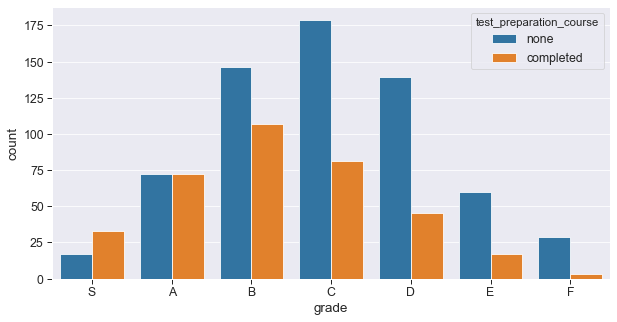

In [23]:
# countplot for grade seperated by test_preparation_course
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = 'grade', hue = 'test_preparation_course')
plt.show()

- No. of students who had none of the test preparation courses were significantly high among the least scorers.
- Students who completed test preparation are more having a S grade whereas the students who did none are more having B, C, D, E & F grade.

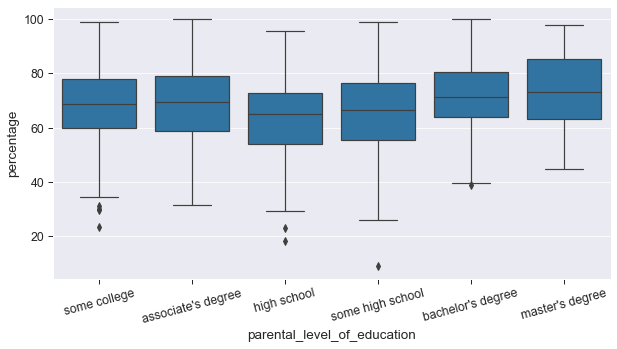

In [24]:
# boxplot for parental_level_of_education vs percentage
plt.figure(figsize = (10, 5))
order = df.parental_level_of_education.value_counts().index
base_color = sns.color_palette()[0]

sns.boxplot(data = df, x = 'parental_level_of_education', y = 'percentage', 
            order = order, color = base_color)
plt.xticks(rotation = 15)
plt.show()

- Students with parents who have completed master's degree scored the best.
- Stuents with parents who have only completed high school had a comparitively low performance in terms of percentage.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- All the scores were centainly highly corelated with a linear relationship. And so was percentage with all the score variables. - No transformations were required to prove this.
- Female students performed well compared to male students, but interestingly outliers were more for female students in the lowest grade than compared to the male students.
- As expected, students who completed the test preparation course, had high percentages as compared to the students who didn't complete the test preparation course.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- There was an interesting relationship found between `parental_level_of_education` and `percentage` feature, but this will not be carried forward in the next section as the difference is not much.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the two main qualitative feature play into determing the scores of students.

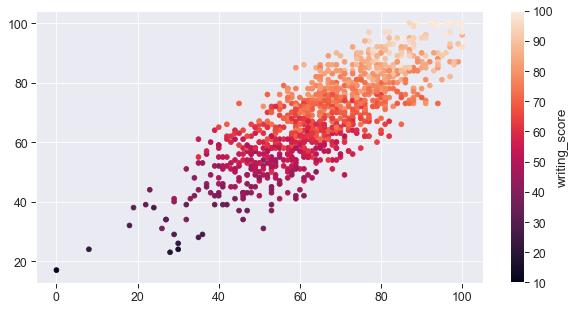

In [25]:
# scatter plot all the scores
plt.figure(figsize = (10, 5))
plt.scatter(data = df, x = 'math_score', y = 'reading_score', c = 'writing_score')
plt.colorbar(label = 'writing_score')
plt.show()

- This only proves that all the scores are higly correlated to each other linearly.

[]

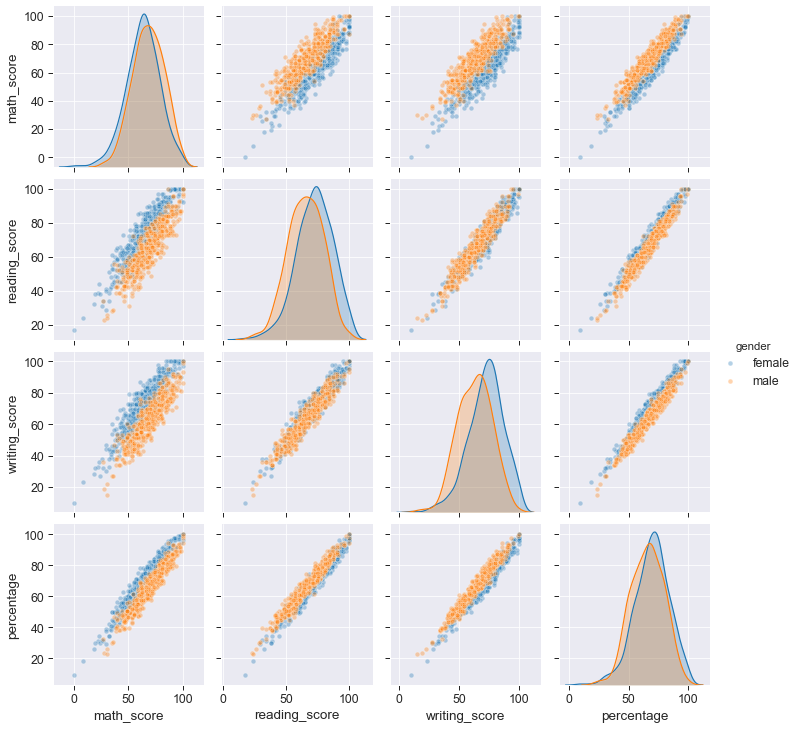

In [26]:
# pairplot for numeric values segregated by gender
sns.pairplot(data = df, hue = 'gender', plot_kws = {'alpha': 1/3})
plt.plot()

- As it can be seen here, female students overall have done better than male students.

[]

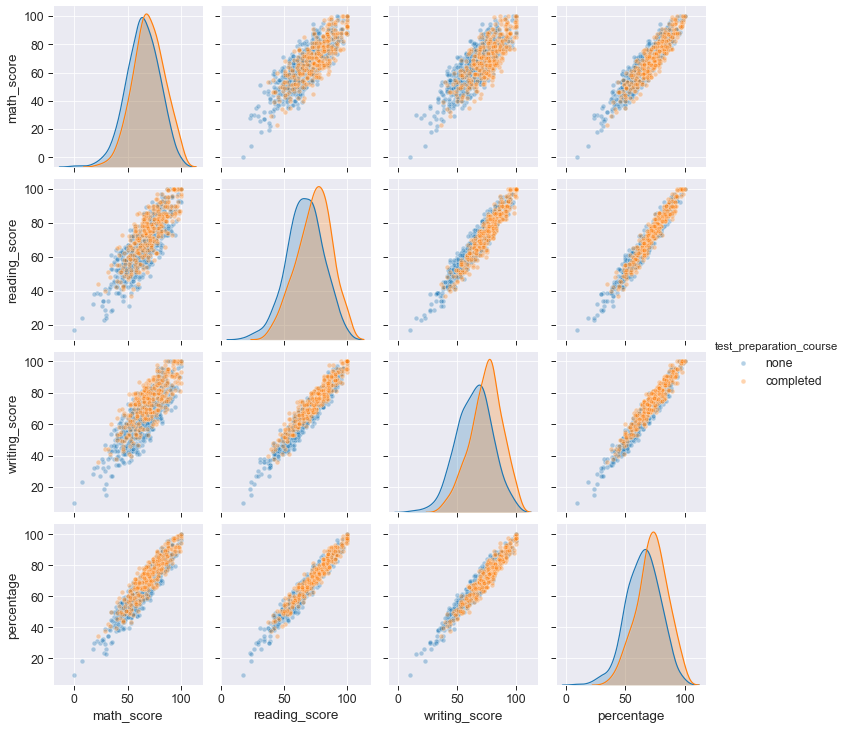

In [27]:
# pairplot for numeric values segregated by test_preparation_course
sns.pairplot(data = df, hue = 'test_preparation_course', plot_kws = {'alpha': 1/3})
plt.plot()

- As it can be seen here, students who have completed the test preparation course have done way better than those who haven't.

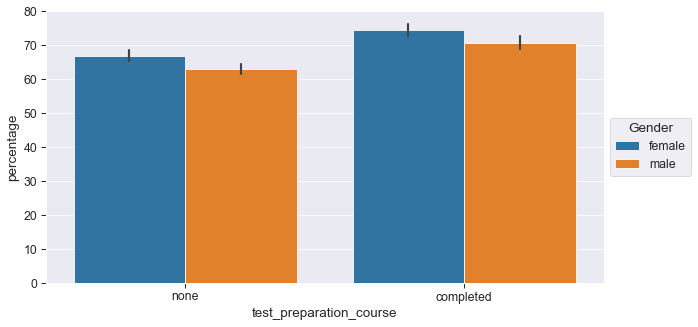

In [28]:
# barplot for both qualitative variable with percentage
plt.figure(figsize = (10, 5))
ax = sns.barplot(data = df, x = 'test_preparation_course', y = 'percentage', hue = 'gender')
ax.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), title = 'Gender')
plt.show()

- As it can be seen, students who completed the `test_preparation_course` scored high percentage.
- Female students did well in both the categories of `test_prepar̥ation_course`.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- I extended my investigation by plotting all the scores in a single scatter plot and as expected, the correlation is high.
- Then I plotted a pairplot for numeric values segregated by `gender` only to prove that female students overall have done better than male students.
- After that, I plotted a pairplot for numeric values segregated by `test_preparation_course` only to prove that students who have completed the test preparation course have done way better than those who haven't.
- Later I concluded with a barplot for both qualitative variable with percentage only to prove what's stated above.

### Were there any interesting or surprising interactions between features?

- Looking back at univariate and bivariate plots, the conclusions derived are similar.
- And also the features aren't fully independent, as shown by the correlation factors and other plots.